In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [14]:
# SEQN 
# BMXWT: kg
# BMXHT: cm
bmx_99 = pd.read_sas("BMX.XPT")
bmx_18 = pd.read_sas("BMX_J.XPT")
demo_99 = pd.read_sas("DEMO.XPT")
demo_18 = pd.read_sas("DEMO_J.XPT")

In [18]:
cols = ["SEQN", "BMXWT", "BMXHT"]
bmx_99 = bmx_99[cols]
bmx_18 = bmx_18[cols]
demo_99 = demo_99[["SEQN", "RIDAGEYR"]]
demo_18 = demo_18[["SEQN", "RIDAGEYR"]]

In [19]:
demo_99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9965 non-null   float64
 1   RIDAGEYR  9965 non-null   float64
dtypes: float64(2)
memory usage: 155.8 KB


In [7]:
bmx_99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9282 entries, 0 to 9281
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    9282 non-null   float64
 1   BMXWT   9197 non-null   float64
 2   BMXHT   8464 non-null   float64
dtypes: float64(3)
memory usage: 217.7 KB


In [44]:
bmx_demo_99 = pd.merge(bmx_99, demo_99, on = "SEQN", how="outer", indicator=True)
bmx_demo_18 = pd.merge(bmx_18, demo_18, on = "SEQN", how="outer", indicator=True)

In [22]:
bmx_demo_99.groupby(["_merge"]).count()

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_20436\3722296213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmx_demo_99.groupby(["_merge"]).count()


,SEQN,BMXWT,BMXHT,RIDAGEYR
_merge,,,,
left_only,0,0,0,0
right_only,683,0,0,683
both,9282,9197,8464,9282


In [45]:
bmx_demo_18.groupby(["_merge"]).count()

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_20436\935092962.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmx_demo_18.groupby(["_merge"]).count()


,SEQN,BMXWT,BMXHT,RIDAGEYR
_merge,,,,
left_only,0,0,0,0
right_only,550,0,0,550
both,8704,8580,8016,8704


In [24]:
bmx_demo_99["SEQN"].nunique()

9965

In [26]:
bmx_demo_99 = bmx_demo_99[bmx_demo_99["_merge"]=="both"]
bmx_demo_99.head()

,SEQN,BMXWT,BMXHT,RIDAGEYR,_merge
0,1.0,12.5,91.6,2.0,both
1,2.0,75.4,174.0,77.0,both
2,3.0,32.9,136.6,10.0,both
3,4.0,13.3,NaN,1.0,both
4,5.0,92.5,178.3,49.0,both


In [46]:
bmx_demo_18 = bmx_demo_18[bmx_demo_18["_merge"]=="both"]

In [27]:
bmx_demo_99.describe()

,SEQN,BMXWT,BMXHT,RIDAGEYR
count,9282.000000,9197.000000,8464.000000,9.282000e+03
mean,4992.751562,59.988192,156.249776,2.898696e+01
std,2869.721839,29.894565,22.389370,2.431215e+01
min,1.000000,3.100000,81.800000,5.397605e-79
25%,2517.250000,39.100000,151.000000,1.000000e+01
50%,4987.500000,63.000000,161.800000,1.900000e+01
75%,7482.750000,79.700000,170.600000,4.700000e+01
max,9965.000000,193.300000,201.300000,8.500000e+01


<Axes: ylabel='Frequency'>

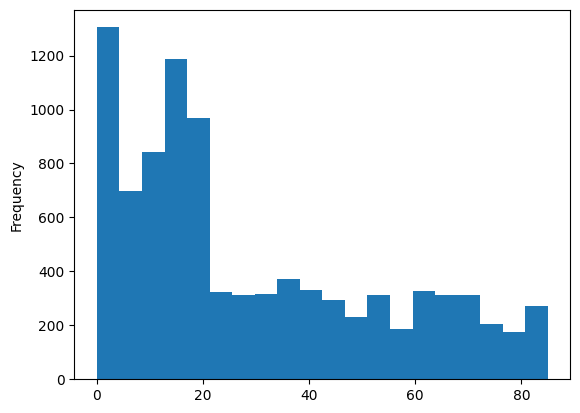

In [30]:
bmx_demo_99["RIDAGEYR"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

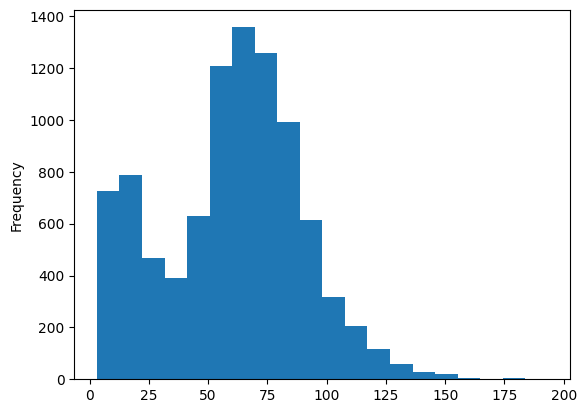

In [31]:
bmx_demo_99["BMXWT"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

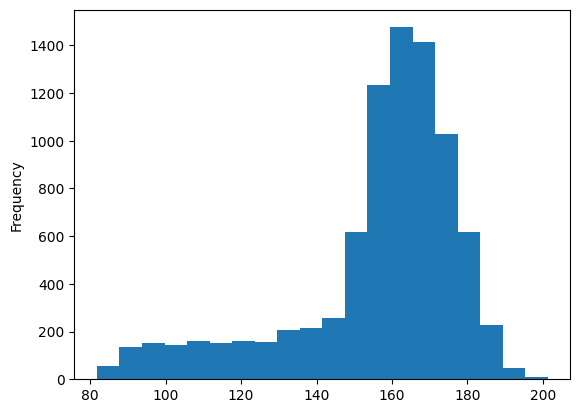

In [32]:
bmx_demo_99["BMXHT"].plot.hist(bins=20)

In [47]:
bmx_demo_99 = bmx_demo_99[bmx_demo_99["RIDAGEYR"]>20]
bmx_demo_18 = bmx_demo_18[bmx_demo_18["RIDAGEYR"]>20]

<Axes: ylabel='Frequency'>

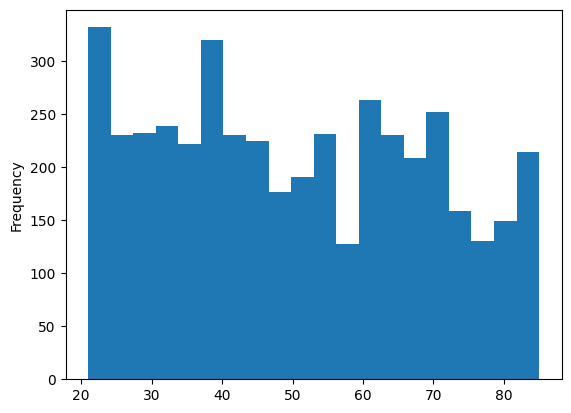

In [34]:
bmx_demo_99["RIDAGEYR"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

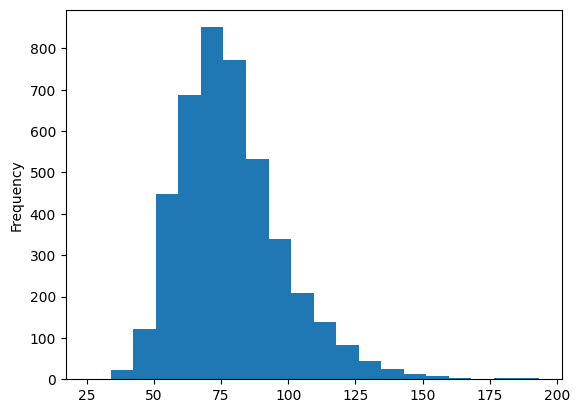

In [36]:
bmx_demo_99["BMXWT"].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

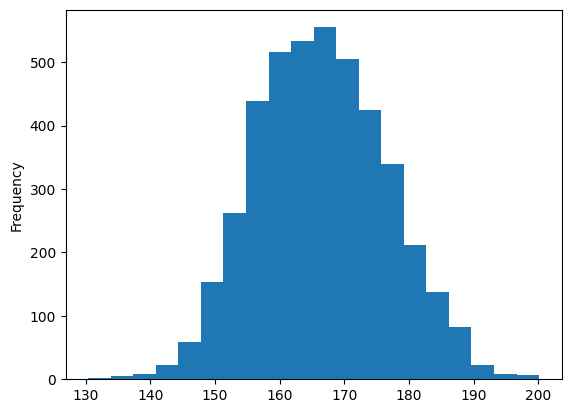

In [38]:
bmx_demo_99["BMXHT"].plot.hist(bins=20)

<Axes: xlabel='BMXHT', ylabel='Count'>

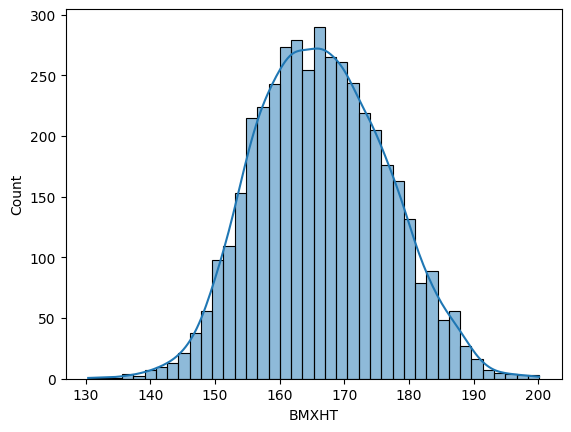

In [40]:
sns.histplot(data=bmx_demo_99, x="BMXHT", kde=True)

<Axes: xlabel='BMXWT', ylabel='Count'>

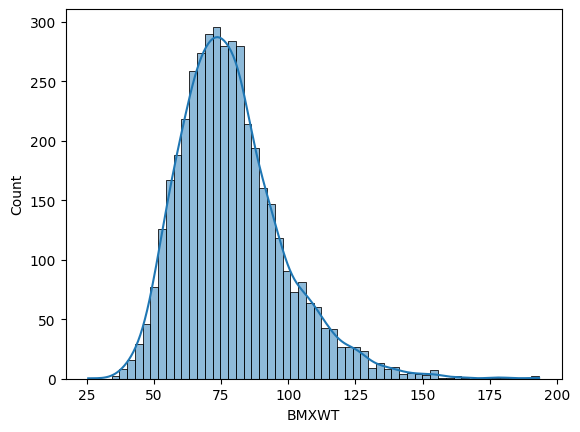

In [42]:
sns.histplot(data=bmx_demo_99, x="BMXWT", kde=True)

<Axes: xlabel='BMXHT', ylabel='Count'>

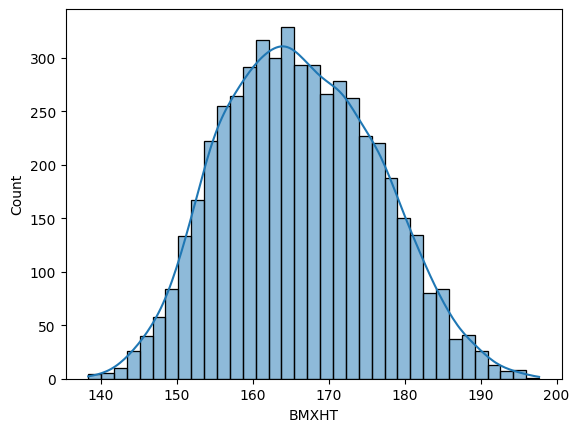

In [49]:
sns.histplot(data=bmx_demo_18, x="BMXHT", kde=True)

<Axes: xlabel='BMXWT', ylabel='Count'>

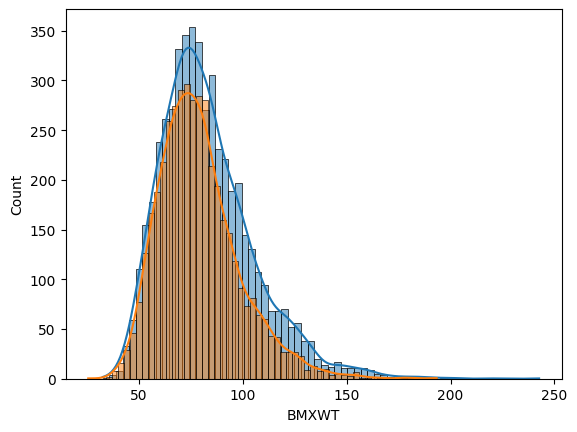

In [52]:
sns.histplot(data=bmx_demo_18, x="BMXWT", kde=True)
sns.histplot(data=bmx_demo_99, x="BMXWT", kde=True)

In [53]:
bmx_demo_18.describe()

,SEQN,BMXWT,BMXHT,RIDAGEYR
count,5193.000000,5113.000000,5113.000000,5193.000000
mean,98287.880031,82.976530,166.259887,51.846332
std,2687.390366,22.932657,10.105071,17.420596
min,93705.000000,32.600000,138.300000,21.000000
25%,95964.000000,67.100000,158.800000,37.000000
50%,98272.000000,79.300000,165.800000,53.000000
75%,100621.000000,94.900000,173.500000,66.000000
max,102956.000000,242.600000,197.700000,80.000000


In [54]:
bmx_demo_99.describe()

,SEQN,BMXWT,BMXHT,RIDAGEYR
count,4795.000000,4306.000000,4294.000000,4795.000000
mean,4962.651512,78.935490,166.439660,51.082377
std,2878.432396,19.541981,10.038746,18.975944
min,2.000000,25.600000,130.400000,21.000000
25%,2416.500000,65.310000,159.100000,34.000000
50%,4964.000000,76.200000,166.100000,50.000000
75%,7435.500000,89.030000,173.500000,67.000000
max,9965.000000,193.300000,200.100000,85.000000


In [ ]:

peso_99 = bmx_demo_99['BMXWT'].dropna().values
peso_18 = bmx_demo_18['BMXWT'].dropna().values



In [ ]:
# El p-valor es alto, como son la misma muestra de datos
# la conclusión debe ser que para p-valor alto, [no puedes rechazar que] la media es la misma
ttest = stats.ttest_ind(peso_99, peso_99, equal_var=False)
ttest

In [88]:
# El p-valor es menor que 0.01, 
# la conclusión debe ser que para p-valor bajo, [no puedes rechazar que] la media es distinta

ttest = stats.ttest_ind(peso_99, peso_18, equal_var=False)
ttest

TtestResult(statistic=-9.233331217285851, pvalue=3.1924651753494236e-20, df=9415.696448539127)

In [83]:
peso_99 = bmx_demo_99['BMXWT'].dropna().values
peso_18 = bmx_demo_18[bmx_demo_18['BMXWT'].dropna().values

ttest = stats.ttest_ind(peso_99, peso_18, equal_var=False)
ttest

TtestResult(statistic=0.0, pvalue=1.0, df=8610.0)

In [89]:
alt_99 = bmx_demo_99['BMXHT'].dropna().values
alt_18 = bmx_demo_18['BMXHT'].dropna().values

In [90]:
ttest = stats.ttest_ind(alt_99, alt_18, equal_var=False)
ttest

TtestResult(statistic=0.862539999661242, pvalue=0.38841304682082367, df=9146.108700706256)

In [95]:
bmx_demo_18.head()

,SEQN,BMXWT,BMXHT,RIDAGEYR,_merge
2,93705.0,79.5,158.3,66.0,both
5,93708.0,53.5,150.2,66.0,both
6,93709.0,88.8,151.1,75.0,both
8,93711.0,62.1,170.6,56.0,both
10,93713.0,74.9,178.6,67.0,both


In [94]:
bmx_demo_99.describe()

,SEQN,BMXWT,BMXHT,RIDAGEYR
count,4795.000000,4306.000000,4294.000000,4795.000000
mean,4962.651512,78.935490,166.439660,51.082377
std,2878.432396,19.541981,10.038746,18.975944
min,2.000000,25.600000,130.400000,21.000000
25%,2416.500000,65.310000,159.100000,34.000000
50%,4964.000000,76.200000,166.100000,50.000000
75%,7435.500000,89.030000,173.500000,67.000000
max,9965.000000,193.300000,200.100000,85.000000


In [66]:
peso_99

array([75.4, 92.5, 78. , ..., 66.4, 83.1, 57.9])